In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ushuaia ar
nome us
katsuura jp
gazojak tm
gazli uz
maku ir
pevek ru
kapaa us
khani ru
lagoa pt
puerto ayora ec
hermanus za
major isidoro br
mahebourg mu
vaini to
ejido ve
khatanga ru
bredasdorp za
jamestown sh
bredasdorp za
aswan eg
roma au
ushuaia ar
klaksvik fo
vaini to
ixtapa mx
bengkulu id
galiwinku au
xam nua la
port alfred za
olafsvik is
norman wells ca
kaitangata nz
qaanaaq gl
kuusamo fi
tuatapere nz
esperance au
caravelas br
albany au
gat ly
mataura pf
ushuaia ar
bredasdorp za
cherskiy ru
karatau kz
tabiauea ki
zverinogolovskoye ru
camacha pt
finnsnes no
saint-joseph re
arraial do cabo br
cambyreta py
riyadh sa
tromso no
vaini to
seoul kr
east london za
albany au
tranas se
san jose gt
saldanha za
tsihombe mg
provideniya ru
saryshagan kz
geraldton au
saint-philippe re
suleja ng
pisco pe
tshikapa cd
punta arenas cl
hobart au
nishihara jp
surgut ru
mys shmidta ru
kodiak us
albany au
hermanus za
sioux lookout ca
kavieng pg
busselton au
fortuna us
hamilton bm
punta arenas cl
butarit

kibala ao
yellowknife ca
rikitea pf
elizabeth city us
port alfred za
longyearbyen sj
mataura pf
ilulissat gl
rikitea pf
lebu cl
atuona pf
kavaratti in
rikitea pf
saint george bm
bluff nz
tabiauea ki
sabang ph
dandong cn
tromso no
barrow us
bluff nz
umzimvubu za
new norfolk au
tuktoyaktuk ca
barrow us
albany au
moose factory ca
saint-philippe re
imeni poliny osipenko ru
jamestown sh
guerrero negro mx
busselton au
lebu cl
georgetown sh
barrie ca
amderma ru
bambous virieux mu
thompson ca
chokurdakh ru
jamestown sh
khandyga ru
yambio sd
butaritari ki
bagotville ca
sao filipe cv
saucillo mx
provideniya ru
bay roberts ca
vao nc
half moon bay us
belushya guba ru
kharp ru
namibe ao
puerto escondido mx
hermanus za
hermanus za
bay roberts ca
rikitea pf
hermanus za
kruisfontein za
astoria us
genhe cn
cabo san lucas mx
barentsburg sj
rikitea pf
odweyne so
adre td
hermanus za
lagoa pt
ushuaia ar
cortez us
belmonte br
chumikan ru
ushuaia ar
iqaluit ca
mogochin ru
castro cl
yellowknife ca
khalandrion

In [6]:
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0ca794d44a8b86333220099976020f0b


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | nome
Processing Record 3 of Set 1 | katsuura
Processing Record 4 of Set 1 | gazojak
Processing Record 5 of Set 1 | gazli
Processing Record 6 of Set 1 | maku
Processing Record 7 of Set 1 | pevek
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | khani
Processing Record 10 of Set 1 | lagoa
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | major isidoro
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | ejido
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | aswan
Processing Record 21 of Set 1 | roma
Processing Record 22 of Set 1 | klaksvik
Processing Record 23 of Set 1 | ixtapa
Processing Record 24 of Set 1 | b

Processing Record 37 of Set 4 | bluff
Processing Record 38 of Set 4 | coahuayana
Processing Record 39 of Set 4 | severo-kurilsk
Processing Record 40 of Set 4 | barrow
Processing Record 41 of Set 4 | georgetown
Processing Record 42 of Set 4 | tuktoyaktuk
Processing Record 43 of Set 4 | grindavik
Processing Record 44 of Set 4 | matay
Processing Record 45 of Set 4 | portland
Processing Record 46 of Set 4 | oshakati
Processing Record 47 of Set 4 | gaoual
Processing Record 48 of Set 4 | erenhot
Processing Record 49 of Set 4 | saskylakh
Processing Record 50 of Set 4 | clyde river
Processing Record 1 of Set 5 | katiola
Processing Record 2 of Set 5 | jitra
Processing Record 3 of Set 5 | upernavik
Processing Record 4 of Set 5 | nouadhibou
Processing Record 5 of Set 5 | kaa-khem
Processing Record 6 of Set 5 | bonavista
Processing Record 7 of Set 5 | hailar
Processing Record 8 of Set 5 | aykhal
Processing Record 9 of Set 5 | businga
Processing Record 10 of Set 5 | nichinan
Processing Record 11 of

Processing Record 25 of Set 8 | amapa
Processing Record 26 of Set 8 | yulara
Processing Record 27 of Set 8 | tomatlan
Processing Record 28 of Set 8 | chagda
City not found. Skipping...
Processing Record 29 of Set 8 | noumea
Processing Record 30 of Set 8 | inyonga
Processing Record 31 of Set 8 | mackay
Processing Record 32 of Set 8 | korla
Processing Record 33 of Set 8 | manokwari
Processing Record 34 of Set 8 | pedernales
Processing Record 35 of Set 8 | assiniboia
Processing Record 36 of Set 8 | aksehir
Processing Record 37 of Set 8 | floro
Processing Record 38 of Set 8 | tevriz
Processing Record 39 of Set 8 | portobelo
Processing Record 40 of Set 8 | natal
Processing Record 41 of Set 8 | pombas
Processing Record 42 of Set 8 | oktyabrskoye
Processing Record 43 of Set 8 | svetlyy
Processing Record 44 of Set 8 | ribeira grande
Processing Record 45 of Set 8 | gushikawa
Processing Record 46 of Set 8 | badalona
Processing Record 47 of Set 8 | cururupu
Processing Record 48 of Set 8 | ouadda


Processing Record 13 of Set 12 | magadan
Processing Record 14 of Set 12 | doha
Processing Record 15 of Set 12 | brownwood
Processing Record 16 of Set 12 | cabedelo
Processing Record 17 of Set 12 | cap malheureux
Processing Record 18 of Set 12 | itupiranga
Processing Record 19 of Set 12 | muisne
Processing Record 20 of Set 12 | banepa
Processing Record 21 of Set 12 | saleaula
City not found. Skipping...
Processing Record 22 of Set 12 | taburi
City not found. Skipping...
Processing Record 23 of Set 12 | hendijan
City not found. Skipping...
Processing Record 24 of Set 12 | koshurnikovo
Processing Record 25 of Set 12 | sidney
Processing Record 26 of Set 12 | general pico
Processing Record 27 of Set 12 | yialos
City not found. Skipping...
Processing Record 28 of Set 12 | bacolod
Processing Record 29 of Set 12 | falealupo
City not found. Skipping...
Processing Record 30 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 31 of Set 12 | narasannapeta
Processing Record 32 of Set

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,31.44,86,28,3.51,AR,2021-09-26 08:01:44
1,Nome,64.5011,-165.4064,42.87,76,1,11.50,US,2021-09-26 08:06:39
2,Katsuura,35.1333,140.3000,71.11,68,100,11.70,JP,2021-09-26 08:06:40
3,Gazojak,41.1875,61.4036,83.30,29,1,11.32,TM,2021-09-26 08:06:40
4,Gazli,40.1333,63.4500,91.96,11,0,10.92,UZ,2021-09-26 08:06:40
5,Maku,39.2911,44.4521,62.10,28,0,4.16,IR,2021-09-26 08:06:40
6,Pevek,69.7008,170.3133,30.00,92,100,13.51,RU,2021-09-26 08:06:41
7,Kapaa,22.0752,-159.3190,79.12,82,90,1.99,US,2021-09-26 08:06:41
8,Khani,41.9563,42.9566,49.57,94,99,0.67,GE,2021-09-26 08:06:41
9,Lagoa,39.0500,-27.9833,69.67,82,22,13.22,PT,2021-09-26 08:06:42


In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

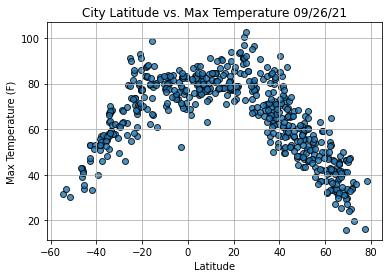

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

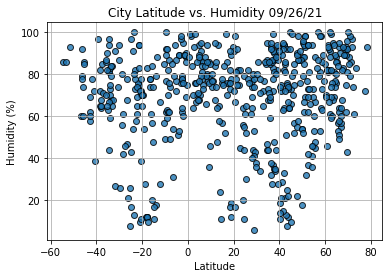

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

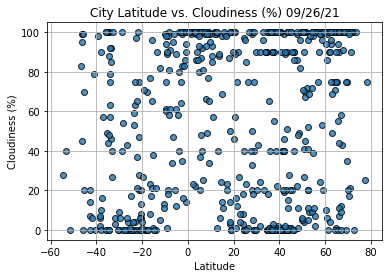

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

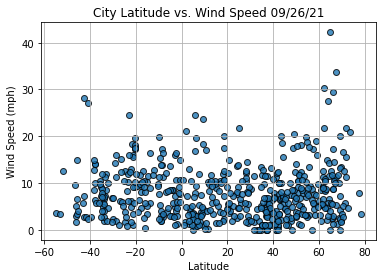

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()